In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import bipartite 
import csv
%matplotlib inline

In [2]:
db_data = pd.read_csv("uniprotlinks.csv")
unip_data = pd.read_csv("uniprot-all2.csv")

In [3]:
df = db_data.rename(columns={'Name': 'Drug Name', 'UniProt Name': 'Protein Name'})
df_2 = unip_data.rename(columns={'Entry': 'UniProt ID', 'Protein names': 'Protein Name', 'Gene names': 'Gene Symbol'})

In [4]:
##Chaning the type of column "Gene Symbol" to list. 
Gene_sym = df_2["Gene Symbol"].tolist()

##Splitting data into list of lists using space delimiter. 
what_i_want = []
for id_ in Gene_sym:
    temp = str(id_).split(' ')
    what_i_want.append(temp)
    
#Trimming off Gene Symbol Aliases 

what_i_actually_want = [id_pair[0] for id_pair in what_i_want]  ##list comprehensions 
    

In [5]:
s = pd.Series(what_i_actually_want)  ##turning the list of values into a series.
df_2['Gene Symbol'] = s.values   ##adding that series to the dataframe. 

In [6]:
##Using merge to merge two dataframes and map the UniProt Id to Gene Symbol. 

combined_df = db_data.merge(df_2, how="left")

In [7]:
##rename 'Name' column in combined_df to 'Drug Name' and 'Type' column to 'Drug Type'.

combined_df2 = combined_df.rename(columns={'Name': 'Drug Name', 'Type': 'Drug Type', 'UniProt Name': 'Protein Names'})
del combined_df2["Protein Name"]

In [8]:
gene_sym = combined_df2["Gene Symbol"]
gene_sym_isnull = pd.isnull(gene_sym)
gene_sym_nulltrue = gene_sym[gene_sym_isnull]
gene_sym_nullfalse = gene_sym[gene_sym_isnull == False]

In [9]:
print(len(gene_sym_nulltrue))

4140


In [10]:
gene_sym_nullfalse.shape

(12028,)

In [11]:
##Dropping rows with empty columns in Gene Symbol. 

combined_df2.dropna(subset=['Gene Symbol'], inplace=True)

In [12]:
#combined_df2.to_csv('drug_gene.tsv', sep='\t')

In [13]:
combined_df2.to_csv('drug_gene.csv')

In [14]:
combined_df2.shape

(12028, 7)

In [15]:
B = nx.Graph()

In [16]:
B.add_nodes_from(combined_df2['Drug Name'], bipartite=0)

B.add_nodes_from(combined_df2['Gene Symbol'], bipartite=1)

B.add_edges_from([(row['Drug Name'], row['Gene Symbol']) for idx, row in combined_df2.iterrows()])

In [17]:
edgelist = B.edges()

In [18]:
#separating the two sets of nodes: drugs and genes. 

d, g = bipartite.sets(B)

In [19]:
len(d)
#list(d)                """to display drugs"""

4923

In [20]:
len(g)
#list(g)                   """to display genes"""

2268

In [21]:
#degree distrubtion of drug nodes. 
d_degree = B.degree(d)

#degree distribution of gene nodes. 
g_degree = B.degree(g)

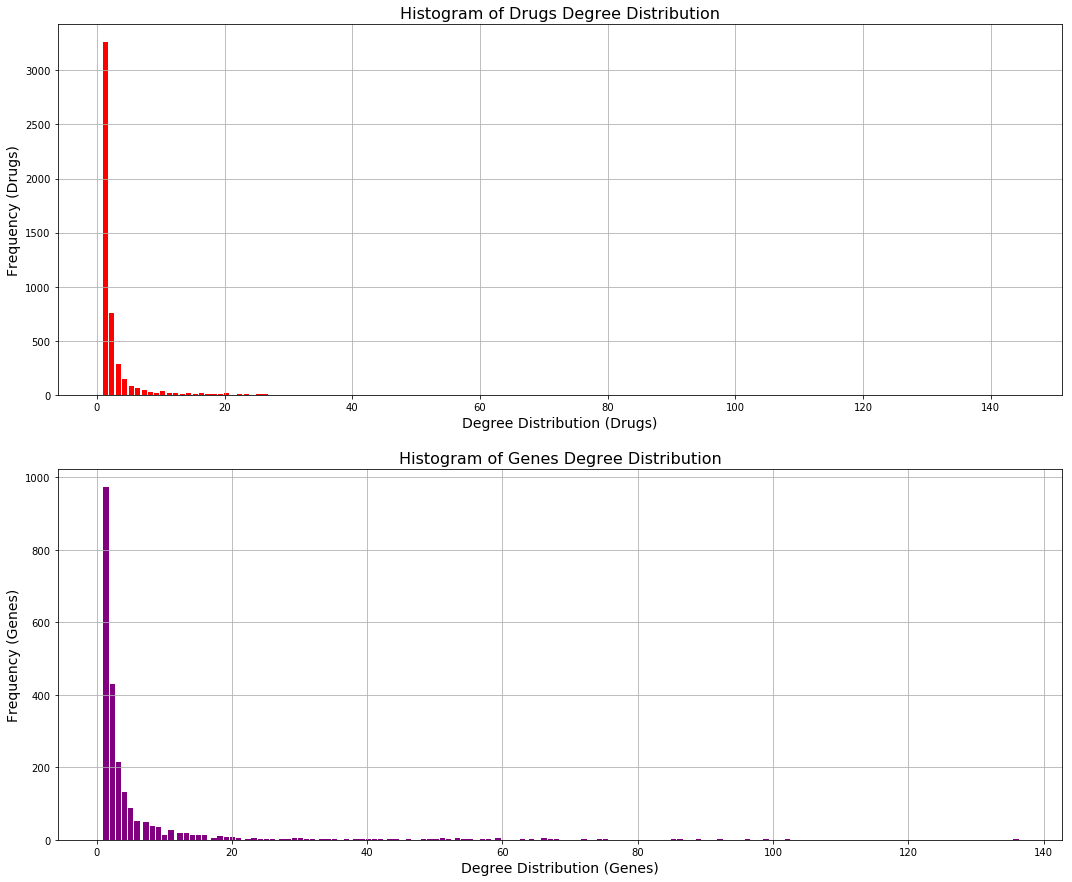

In [22]:
fig = plt.figure(figsize=(18,15))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
d_ax1 = [item[1] for item in list(d_degree.items())]      ##genes
g_ax2 = [item[1] for item in list(g_degree.items())]    ##drugs

ax1.set_xlabel('Degree Distribution (Drugs)', size=14)
ax1.set_ylabel('Frequency (Drugs)', size=14)
ax1.set_title('Histogram of Drugs Degree Distribution', size=16)
ax1.hist(d_ax1, bins='auto', color='red', rwidth=5, width=0.8)

ax2.set_xlabel('Degree Distribution (Genes)', size=14)
ax2.set_ylabel('Frequency (Genes)', size=14)
ax2.set_title('Histogram of Genes Degree Distribution', size=16)
ax2.hist(g_ax2, bins='auto', color='purple', rwidth=5, width=0.8)


ax1.grid(True)
ax2.grid(True)
#plt.savefig('drug_gene.png')
plt.show()


In [23]:
string = pd.read_csv("HumanStringNet.txt", delimiter="\t", header=None)
string.head()

,0,1,2
0,M6PR,PLIN3,0.903
1,ESRRA,SIRT1,0.946
2,ESRRA,NRF1,0.956
3,ESRRA,NRBP1,0.911
4,ESRRA,NR1D1,0.909


In [24]:
string_df = string.rename(columns={0: 'Gene Name', 1: 'Interacting Gene', 2: 'Interaction Weight'})

In [25]:
string_df['Gene_Gene'] = string_df[['Gene Name', 'Interacting Gene']].apply(tuple, axis=1)
string_df.head()

,Gene Name,Interacting Gene,Interaction Weight,Gene_Gene
0,M6PR,PLIN3,0.903,"(M6PR, PLIN3)"
1,ESRRA,SIRT1,0.946,"(ESRRA, SIRT1)"
2,ESRRA,NRF1,0.956,"(ESRRA, NRF1)"
3,ESRRA,NRBP1,0.911,"(ESRRA, NRBP1)"
4,ESRRA,NR1D1,0.909,"(ESRRA, NR1D1)"


In [26]:
edges = string_df["Gene_Gene"].tolist()

In [27]:
G = nx.Graph()
G.add_edges_from(edges)
degree = G.degree()

In [28]:
len(G.edges())

160249

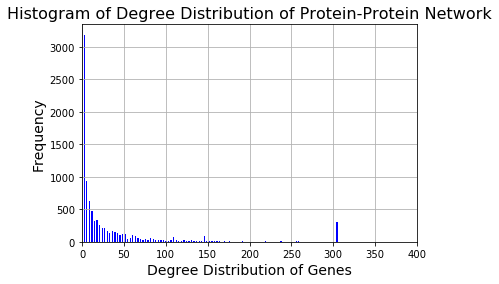

In [29]:
plt.xlabel('Degree Distribution of Genes', size=14)
plt.ylabel('Frequency', size=14)
plt.title('Histogram of Degree Distribution of Protein-Protein Network', size=16)
#plt.ylim(0,2000)
plt.xlim(0,400)

degrees = [item[1] for item in list(degree.items())]

plt.hist(degrees, bins='auto', color='blue', rwidth=0.5)
plt.grid(True)
#plt.savefig('stringnetwork.png')                                         #do savefig before show()!
plt.show()

In [30]:
string_df.to_csv('stringnetwork.tsv', sep='\t')
string_df.to_csv('stringnetwork.csv')

In [31]:
drug_list = pd.read_csv("donor_therapy.tsv", delimiter="\t")

In [32]:
#dropping rows with NaN values in other_therapy column. 
drug_col = drug_list["other_therapy"]
drug_col_isnull = pd.isnull(drug_col)
drug_col_nullfalse = drug_col[drug_col_isnull == False]
drug_list.dropna(subset=['other_therapy'], inplace=True)

#dropping rows with 'unknonwn' values in other_therapy column. 
drug_list1 = drug_list[drug_list.other_therapy.str.contains("unknown") == False]
#drug_list1.to_csv('drug_list.csv')

#not_unknown = [x == 'unknown' for x in drug_list['other_therapy']]

In [33]:
max(degree, key=degree.get)  
degree['UBC']

1746

In [34]:
G.neighbors('M6PR')

['PLIN3', 'GGA3', 'GGA1', 'IGF2R']

In [35]:
"""Takes the drug as node argument to find the genes that a specific drug works on in graph B(drug-gene graph),
   then, finding the neighboring genes of those genes."""


def neighbor_nodes(G, node):
    graph = nx.Graph()
    nodes = B.neighbors(node)
    for node in nodes:
        neighbors = []
        if node in G:
            neighbor = G.neighbors(node)
            neighbors.append(neighbor)
            print(neighbors)
            
    

In [55]:
neighbor_nodes(G, "Anastrozole" )

[['AKR1D1', 'ESR1', 'CYP3A5', 'SULT1E1', 'HSD17B7', 'SRD5A1', 'HSD17B12', 'GDF9', 'UGT1A6', 'UGT2B7', 'UGT1A1', 'UGT2B4', 'HSD17B6', 'UGT2B17', 'CYP3A4', 'UGT1A10', 'NR5A2', 'HSD3B1', 'HSD3B2', 'UGT1A4', 'UGT1A5', 'UGT1A7', 'UGT1A8', 'HSD17B3', 'NR0B1', 'CYP1A1', 'UGT2A1', 'UGT1A3', 'HSD17B1', 'CYP11B1', 'CYP11B2', 'CYP17A1']]


In [37]:
n = B.neighbors("Letrozole")
k = B.subgraph(n)
n

['CYP19A1']

In [38]:
n = B.neighbors("Exemestane")
k = B.subgraph(n)
n

['CYP19A1']

In [39]:
n = B.neighbors("Tamoxifen")
k = B.subgraph(n)
n

['ESR1',
 'ESR2',
 'EBP',
 'PRKCA',
 'PRKCB',
 'PRKCD',
 'PRKCE',
 'PRKCG',
 'PRKCI',
 'PRKCQ',
 'PRKCZ']

In [40]:
def neighbors(self, n):
    try:
        return list(self.adj[n])
    except KeyError:
        raise NetworkXError("The node %s is not in the graph." % (n,))

In [41]:
G.has_node('CDPX2')                            #finds if a node is in a graph

False

In [42]:
n = B.neighbors("Docetaxel")
k = B.subgraph(n)

In [43]:
ensembl = pd.read_csv("mart_export.txt", delimiter="\t")
ensembl.to_csv('ensembl.csv')
ensembl.head()

,Gene name,Gene stable ID
0,snoZ6,ENSG00000264452
1,PVT1_3,ENSG00000278324
2,U6,ENSG00000283502
3,RN7SL836P,ENSG00000241226
4,RNU2-44P,ENSG00000252604


In [44]:
len(ensembl)

63898

In [45]:
somatic_mutation = pd.read_csv("simple_somatic_mutation.BRCA-EU.tsv", delimiter='\t')

In [59]:
somatic_mutation.shape

(12487266, 42)

In [47]:
list(somatic_mutation.columns.values)

['icgc_mutation_id',
 'icgc_donor_id',
 'project_code',
 'icgc_specimen_id',
 'icgc_sample_id',
 'matched_icgc_sample_id',
 'submitted_sample_id',
 'submitted_matched_sample_id',
 'chromosome',
 'chromosome_start',
 'chromosome_end',
 'chromosome_strand',
 'assembly_version',
 'mutation_type',
 'reference_genome_allele',
 'mutated_from_allele',
 'mutated_to_allele',
 'quality_score',
 'probability',
 'total_read_count',
 'mutant_allele_read_count',
 'verification_status',
 'verification_platform',
 'biological_validation_status',
 'biological_validation_platform',
 'consequence_type',
 'aa_mutation',
 'cds_mutation',
 'gene_affected',
 'transcript_affected',
 'gene_build_version',
 'platform',
 'experimental_protocol',
 'sequencing_strategy',
 'base_calling_algorithm',
 'alignment_algorithm',
 'variation_calling_algorithm',
 'other_analysis_algorithm',
 'seq_coverage',
 'raw_data_repository',
 'raw_data_accession',
 'initial_data_release_date']

In [48]:
#sorting the drug_list BRCA data according to the drugs in other_therapy column. 

sorted_druglist = drug_list1.sort_values("other_therapy") 
sorted_druglist.to_csv("sorted_druglist.csv")

In [49]:
sorted_druglist1 = pd.read_csv("sorted_druglist1.csv")

In [50]:
sorted_druglist1

,Unnamed: 0,icgc_donor_id,project_code,submitted_donor_id,first_therapy_type,first_therapy_therapeutic_intent,first_therapy_start_interval,first_therapy_duration,first_therapy_response,second_therapy_type,second_therapy_therapeutic_intent,second_therapy_start_interval,second_therapy_duration,second_therapy_response,other_therapy,other_therapy_response
0,301,DO225240,BRCA-EU,CGP_donor_1711733,radiation therapy,adjuvant,70.0,21.0,unknown,other therapy,adjuvant,NaN,NaN,NaN,1st therapy - 15x40Gy; 2nd therapy - Hormone_t...,unknown
1,268,DO225210,BRCA-EU,CGP_donor_1686151,radiation therapy,adjuvant,63.0,27.0,unknown,other therapy,adjuvant,77.0,1800.0,NaN,1st therapy - 16x2.66Gy; 2nd therapy - Hormone...,unknown
2,292,DO225238,BRCA-EU,CGP_donor_1711730,radiation therapy,adjuvant,47.0,18.0,unknown,other therapy,adjuvant,NaN,NaN,NaN,1st therapy - 25Gyx40; 2nd therapy - Hormone_t...,unknown
3,300,DO225241,BRCA-EU,CGP_donor_1711734,radiation therapy,adjuvant,40.0,36.0,unknown,other therapy,adjuvant,84.0,NaN,NaN,1st therapy - 25x50Gy; 2nd therapy - Hormone_t...,unknown
4,243,DO225313,BRCA-EU,CGP_donor_1835948,radiation therapy,adjuvant,47.0,13.0,unknown,other therapy,adjuvant,40.0,1826.0,NaN,1st therapy - 30Gyx10; 2nd therapy - Hormone_t...,unknown
5,295,DO225235,BRCA-EU,CGP_donor_1711727,radiation therapy,adjuvant,70.0,NaN,unknown,other therapy,adjuvant,NaN,NaN,NaN,1st therapy - 40Gyx15 (breast); 2nd therapy - ...,unknown
6,241,DO225315,BRCA-EU,CGP_donor_1835953,radiation therapy,adjuvant,55.0,22.0,unknown,other therapy,adjuvant,69.0,1826.0,NaN,1st therapy - 40Gyx15; 2nd therapy - Hormone_t...,unknown
7,307,DO225244,BRCA-EU,CGP_donor_1711737,radiation therapy,adjuvant,38.0,NaN,unknown,other therapy,adjuvant,72.0,NaN,NaN,1st therapy - 40Gyx15; 2nd therapy - Hormone_t...,unknown
8,84,DO225091,BRCA-EU,CGP_donor_1512432,chemotherapy,adjuvant,NaN,NaN,unknown,other therapy,adjuvant,NaN,NaN,NaN,1st therapy - 4TC; 2nd therapy - Hormone_therapy,unknown
9,294,DO225236,BRCA-EU,CGP_donor_1711728,radiation therapy,adjuvant,42.0,28.0,unknown,other therapy,adjuvant,NaN,NaN,NaN,1st therapy - 50Gyx20 + 25Gyx8; 2nd therapy - ...,unknown


In [56]:
combined_mutation_brca_data = sorted_druglist1.merge(somatic_mutation, how="left")

In [64]:
combined_mutation_brca_data.head(30)

,Unnamed: 0,icgc_donor_id,project_code,submitted_donor_id,first_therapy_type,first_therapy_therapeutic_intent,first_therapy_start_interval,first_therapy_duration,first_therapy_response,second_therapy_type,...,experimental_protocol,sequencing_strategy,base_calling_algorithm,alignment_algorithm,variation_calling_algorithm,other_analysis_algorithm,seq_coverage,raw_data_repository,raw_data_accession,initial_data_release_date
0,301,DO225240,BRCA-EU,CGP_donor_1711733,radiation therapy,adjuvant,70.0,21.0,unknown,other therapy,...,NaN,WGS,NaN,BWA v0.5.9 http://www.bio-bwa.sourceforge.net,CaVEMan http://http://cancerit.github.io/CaVEMan/,NaN,NaN,EGA,EGAS00001001178,NaN
1,301,DO225240,BRCA-EU,CGP_donor_1711733,radiation therapy,adjuvant,70.0,21.0,unknown,other therapy,...,NaN,WGS,NaN,BWA v0.5.9 http://www.bio-bwa.sourceforge.net,CaVEMan http://http://cancerit.github.io/CaVEMan/,NaN,NaN,EGA,EGAS00001001178,NaN
2,301,DO225240,BRCA-EU,CGP_donor_1711733,radiation therapy,adjuvant,70.0,21.0,unknown,other therapy,...,NaN,WGS,NaN,BWA v0.5.9 http://www.bio-bwa.sourceforge.net,CaVEMan http://http://cancerit.github.io/CaVEMan/,NaN,NaN,EGA,EGAS00001001178,NaN
3,301,DO225240,BRCA-EU,CGP_donor_1711733,radiation therapy,adjuvant,70.0,21.0,unknown,other therapy,...,NaN,WGS,NaN,BWA v0.5.9 http://www.bio-bwa.sourceforge.net,CaVEMan http://http://cancerit.github.io/CaVEMan/,NaN,NaN,EGA,EGAS00001001178,NaN
4,301,DO225240,BRCA-EU,CGP_donor_1711733,radiation therapy,adjuvant,70.0,21.0,unknown,other therapy,...,NaN,WGS,NaN,BWA v0.5.9 http://www.bio-bwa.sourceforge.net,CaVEMan http://http://cancerit.github.io/CaVEMan/,NaN,NaN,EGA,EGAS00001001178,NaN
5,301,DO225240,BRCA-EU,CGP_donor_1711733,radiation therapy,adjuvant,70.0,21.0,unknown,other therapy,...,NaN,WGS,NaN,BWA v0.5.9 http://www.bio-bwa.sourceforge.net,CaVEMan http://http://cancerit.github.io/CaVEMan/,NaN,NaN,EGA,EGAS00001001178,NaN
6,301,DO225240,BRCA-EU,CGP_donor_1711733,radiation therapy,adjuvant,70.0,21.0,unknown,other therapy,...,NaN,WGS,NaN,BWA v0.5.9 http://www.bio-bwa.sourceforge.net,CaVEMan http://http://cancerit.github.io/CaVEMan/,NaN,NaN,EGA,EGAS00001001178,NaN
7,301,DO225240,BRCA-EU,CGP_donor_1711733,radiation therapy,adjuvant,70.0,21.0,unknown,other therapy,...,NaN,WGS,NaN,BWA v0.5.9 http://www.bio-bwa.sourceforge.net,CaVEMan http://http://cancerit.github.io/CaVEMan/,NaN,NaN,EGA,EGAS00001001178,NaN
8,301,DO225240,BRCA-EU,CGP_donor_1711733,radiation therapy,adjuvant,70.0,21.0,unknown,other therapy,...,NaN,WGS,NaN,BWA v0.5.9 http://www.bio-bwa.sourceforge.net,CaVEMan http://http://cancerit.github.io/CaVEMan/,NaN,NaN,EGA,EGAS00001001178,NaN
9,301,DO225240,BRCA-EU,CGP_donor_1711733,radiation therapy,adjuvant,70.0,21.0,unknown,other therapy,...,NaN,WGS,NaN,BWA v0.5.9 http://www.bio-bwa.sourceforge.net,CaVEMan http://http://cancerit.github.io/CaVEMan/,NaN,NaN,EGA,EGAS00001001178,NaN


In [66]:
a = pd.Series(combined_mutation_brca_data["icgc_donor_id"])

a.value_counts()


DO225209    120406
DO217844     88574
DO225169     58758
DO225023     51004
DO225249     43827
DO224709     40949
DO218176     40009
DO225226     35163
DO225168     33297
DO224717     30122
DO218269     29070
DO225170     24280
DO225300     23264
DO225274     23247
DO218212     23156
DO224704     22023
DO225171     21991
DO224553     19832
DO218419     19222
DO225019     19050
DO225244     17786
DO225223     17651
DO225056     17645
DO224590     17512
DO225307     17354
DO217907     16905
DO218404     16786
DO224950     16335
DO218150     15865
DO225175     13939
             ...  
DO225085      6698
DO224990      6653
DO225250      6323
DO225308      6232
DO225302      6168
DO225077      6006
DO225241      5892
DO225082      5807
DO225315      5787
DO225240      5783
DO225313      5769
DO218719      5652
DO225076      5611
DO225183      5559
DO218770      5430
DO218457      5323
DO225063      5219
DO224824      5145
DO225051      5119
DO225291      5087
DO218377      5029
DO224992    